<a href="https://colab.research.google.com/github/Mariana-code/ADOConectionTests/blob/main/Actividad_4_1_Procesos_de_la_vida_real_como_distribuciones_de_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4.1
### Procesos de la vida real como distribuciones de probabilidad


Instrucciones
1. Selecciona un proceso o fenómeno del día a día que te interese analizar.

2. Determina qué atributo del proceso podrías medir. Por ejemplo temperatura de un día, número de personas en una tienda, etc.

3. Realiza observaciones del proceso y registra mediciones. Nota: este paso puede ser omitido si se utiliza un conjunto de datos ya recolectados, por ejemplo datos de Kaggle.

4. Utiliza un histograma para graficar la frecuencia con la que ocurren las observaciones. ¿El histograma se parece a alguna distribución de probabilidad que conoces?

5. Aplica una herramienta de ajuste de distribución para conocer cual es el modelo más apropiado. En Python se sugiere el uso de la librería Fitter https://fitter.readthedocs.io/Links to an external site.

 6. Identifica cuáles son los parámetros más apropiados que describen la distribución seleccionada.

7. Reflexiona: ¿Cuáles son los parámetros de la distribución? ¿Cómo podrías utilizar el modelo creado?  ¿Puedes usar distribuciones de probabilidad para identificar similitudes entre varios procesos?

## Pasos diarios durante 1 mes


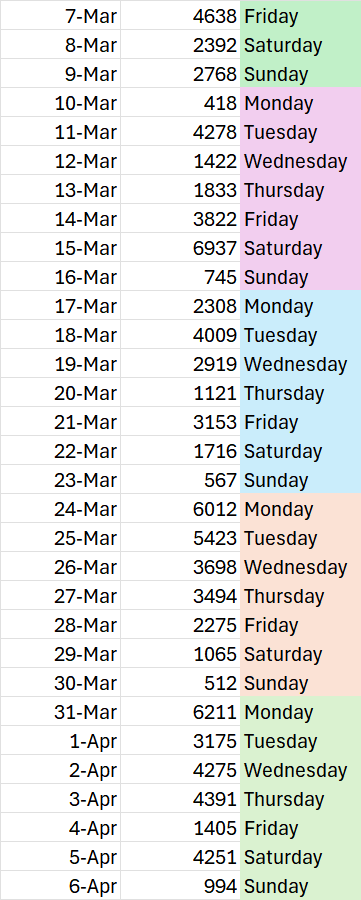

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Actividad 4.1.xlsx to Actividad 4.1.xlsx


In [7]:
import pandas as pd

df = pd.read_excel("Actividad 4.1.xlsx")

print(df)


         Dias  Pasos Dias Semana
0  2025-03-07   4638      Friday
1  2025-03-08   2392   Saturday 
2  2025-03-09   2768      Sunday
3  2025-03-10    418      Monday
4  2025-03-11   4278     Tuesday
5  2025-03-12   1422   Wednesday
6  2025-03-13   1833    Thursday
7  2025-03-14   3822      Friday
8  2025-03-15   6937    Saturday
9  2025-03-16    745      Sunday
10 2025-03-17   2308      Monday
11 2025-03-18   4009     Tuesday
12 2025-03-19   2919   Wednesday
13 2025-03-20   1121    Thursday
14 2025-03-21   3153      Friday
15 2025-03-22   1716    Saturday
16 2025-03-23    567      Sunday
17 2025-03-24   6012      Monday
18 2025-03-25   5423     Tuesday
19 2025-03-26   3698   Wednesday
20 2025-03-27   3494    Thursday
21 2025-03-28   2275      Friday
22 2025-03-29   1065    Saturday
23 2025-03-30    512      Sunday
24 2025-03-31   6211      Monday
25 2025-04-01   3175     Tuesday
26 2025-04-02   4275   Wednesday
27 2025-04-03   4391    Thursday
28 2025-04-04   1405      Friday
29 2025-04

In [4]:
!pip uninstall numpy fitter -y
!pip install numpy --upgrade --force-reinstall && pip install fitter

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 88.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 444.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled 

In [2]:
!pip install fitter
import fitter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from fitter import Fitter

In [6]:
!pip install --force-reinstall --no-cache-dir numpy scipy matplotlib fitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 142.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 144.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 222.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 217.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 221.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 176.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 143.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 146.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 185.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 207.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 189.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

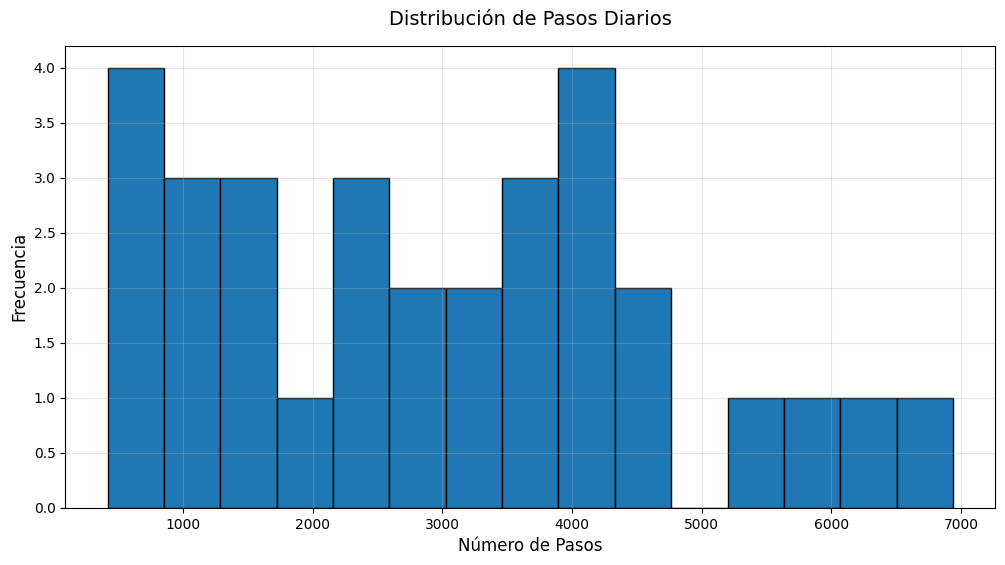

In [8]:
plt.figure(figsize=(12, 6))
# Dibujo del histograma de la columna 'Pasos' del DataFrame df dividido en 15 frecuencias/bins
plt.hist(df['Pasos'], bins=15, edgecolor='black')
plt.title('Distribución de Pasos Diarios', fontsize=14, pad=15)
plt.xlabel('Número de Pasos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


 ### Similitud del Histograma con una **distribución** de probabilidad

 El Histograma tiene similitud a una distribución normal / Gaussiana, pues se puede apreciar una simetria casi perfecta con una media y mediana de ~2900 pasos, una ligera asimetria positiva donde podemos observar una tendencia hacia valores mas altos; hay ligeramente mas dias con pasos por encima de la media que por debajo.
 Los valores mas comunes se encuentran cerca de los 3500 pasos y la mayoria de los dias tienen entre 2000 y 5000 pasos.


Estadísticas de Pasos Diarios:
Promedio: 2975 pasos
Máximo: 6937 pasos
Mínimo: 418 pasos
Mediana: 2919 pasos


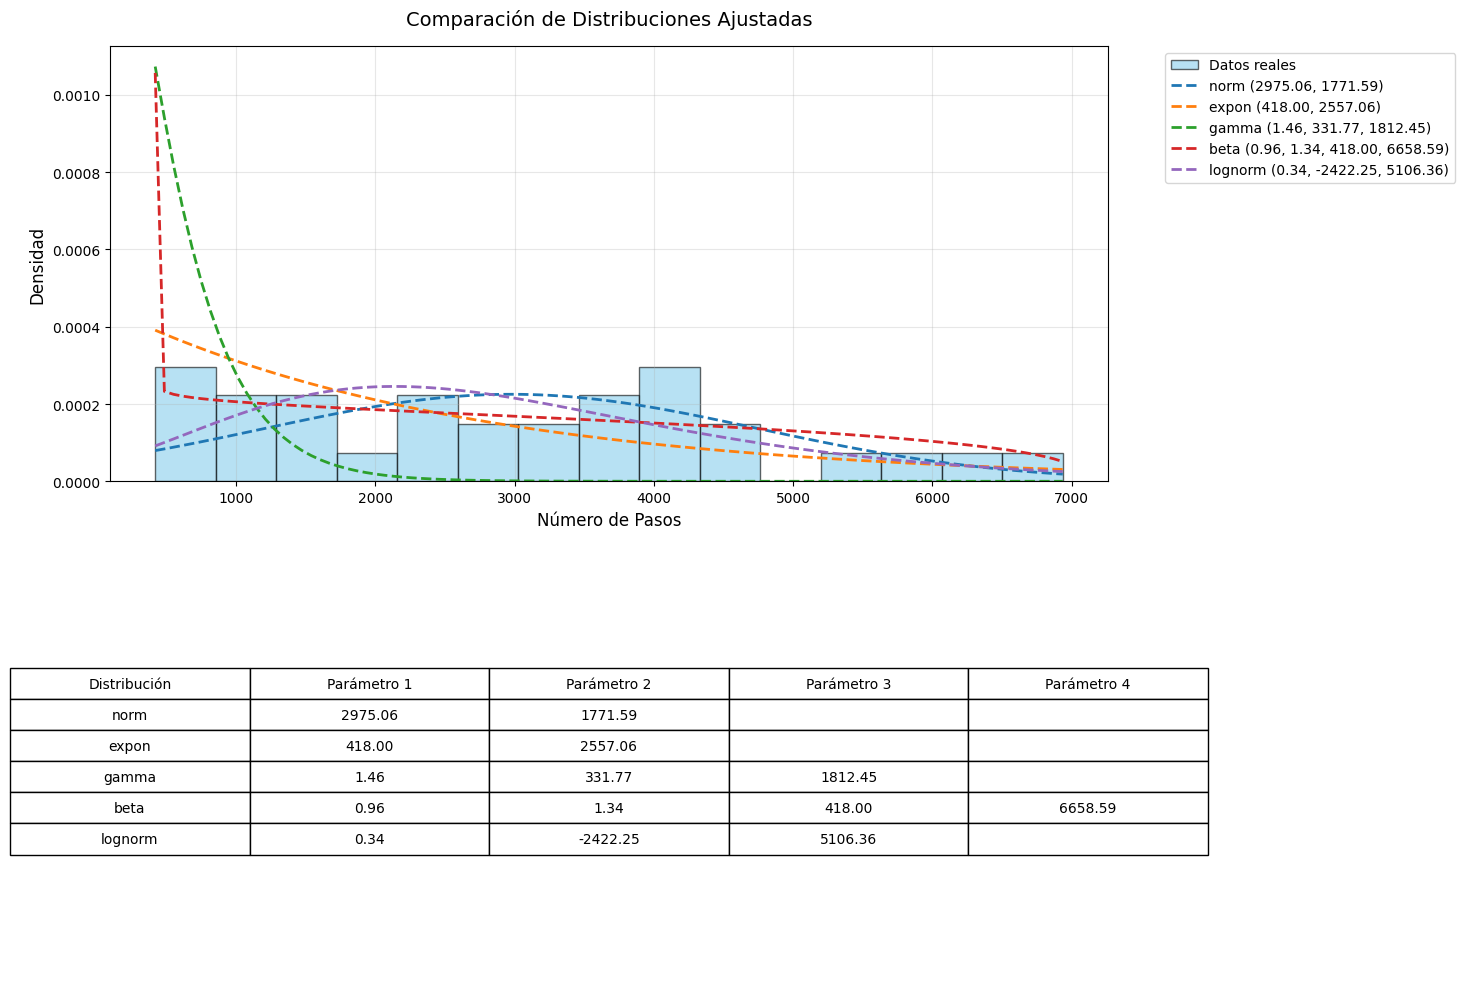


La mejor distribución ajustada es: {'beta': {'a': 0.9564686332329313, 'b': 1.3414421542028507, 'loc': 417.99999999999994, 'scale': 6658.586693887893}}

Parámetros de la mejor distribución:
Parámetro A: 0.9565
Parámetro B: 1.3414
Parámetro C: 418.0000
Parámetro D: 6658.5867


In [11]:
# Estadísticas básicas
print("\nEstadísticas de Pasos Diarios:")
print(f"Promedio: {df['Pasos'].mean():.0f} pasos")
print(f"Máximo: {df['Pasos'].max()} pasos")
print(f"Mínimo: {df['Pasos'].min()} pasos")
print(f"Mediana: {df['Pasos'].median():.0f} pasos")

# Ajuste de distribuciones
pasos = df['Pasos'].values
f = fitter.Fitter(pasos, distributions=['norm', 'expon', 'gamma', 'beta', 'lognorm'])
f.fit()

# Visualización de distribuciones ajustadas
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)

# Histograma de datos reales
plt.hist(pasos, bins=15, density=True, alpha=0.6, color='skyblue',
         edgecolor='black', label='Datos reales')

# Graficamiento de las distribuciones ajustadas
for distribution in f.fitted_param:
    params = f.fitted_param[distribution]
    x = np.linspace(min(pasos), max(pasos), 100)

    if distribution == 'norm':
        y = stats.norm.pdf(x, params[0], params[1])
    elif distribution == 'expon':
        y = stats.expon.pdf(x, *params)
    elif distribution == 'gamma':
        y = stats.gamma.pdf(x, params[0], scale=params[1])
    elif distribution == 'beta':
      y = stats.beta.pdf(x, params[0], params[1], loc=params[2], scale=params[3])
    elif distribution == 'lognorm':
      if len(params) == 2:
          y = stats.lognorm.pdf(x, params[0], scale=params[1])
      elif len(params) == 3:
          y = stats.lognorm.pdf(x, params[0], loc=params[1], scale=params[2])


    # Grafica de la distribución ajustada
    plt.plot(x, y, '--', linewidth=2, label=f'{distribution} ({", ".join([f"{p:.2f}" for p in params])})')



plt.title('Comparación de Distribuciones Ajustadas', fontsize=14, pad=15)
plt.xlabel('Número de Pasos', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Tabla de parámetros
plt.subplot(2, 1, 2)
plt.axis('off')
table_data = []
# Número máximo de parámetros entre todas las distribuciones
max_params = max(len(f.fitted_param[dist]) for dist in f.fitted_param)
col_labels = ['Distribución'] + [f'Parámetro {i+1}' for i in range(max_params)]

# Crear los datos de la tabla
for dist in f.fitted_param:
    params = f.fitted_param[dist]
    row = [dist] + [f"{p:.2f}" for p in params]
    row += [''] * (max_params - len(params))
    table_data.append(row)

table = plt.table(cellText=table_data,
                 colLabels=col_labels,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.tight_layout()
plt.show()

# Mostrar la mejor distribución
best_dist = f.get_best(method='sumsquare_error')
print(f"\nLa mejor distribución ajustada es: {best_dist}")
print("\nParámetros de la mejor distribución:")

# Obtener el nombre de la mejor distribución
best_dist_name = list(best_dist.keys())[0]
params = f.fitted_param[best_dist_name]

for i, value in enumerate(params):
    print(f"Parámetro {chr(65+i)}: {value:.4f}")

### Parametros de la distribucion

Los parámetros de las distribuciones describen la forma, ubicación y escala de los datos.

Podemos observar que la libreria fitter nos muestra las diferentes distribuciones y los parametros de cada una, demostrando asi la distribucion mas adecuada basada en el metodo de "error cuadratico total", donde se elige la distribución con el menor error cuadrático total, midiendo qué tan diferente es la curva ajustada respecto al histograma de los datos reales.
Así determinando cuál distribución se adapta mejor estadísticamente a los datos.

Podemos distinguir distribuciones como la normal que mencione anteriormente, la cual tiene cierto parecido a la forma del histograma, sin embargo, la distribucion beta es la que se indica ideal. En la grafica se puede apreciar que Beta fue la distribucion ajustada que mas se acerco a la forma real de la distribucion de pasos, y en la tabla podemos observar como nos arroja los siguientes parametros:
- 'a': 0.9564686332329313 -> Shape 1 | Forma izquierda del pico
- 'b': 1.3414421542028507 -> Shape 2 | Forma derecha del pico
- 'loc': 417.99999999999994 -> Localizacion | Valor mínimo de la distribución
- 'scale': 6658.586693887893 -> Escala | Rango desde mínimo hasta máximo

### Uso del modelo creado
El modelo creado puede ser utilizado para predecir los dias tipicos, detectar patrones nuevos o anormales, y establecer metas realistas basadas en mi distribucion.
Tambien puedo comparar periodos de actividad y programar sesiones de ejercicio adicionales tomando en cuenta los dias de menor actividad y la frecuencia de estos.
### Identificacion de similitudes entre varios procesos
Las distribuciones de probabilidad pueden ayudarnos a comparar la variabilidad y el comportamiento de diferentes conjuntos de datos o procesos, por lo que, no solo nos ayudan a modelar datos, sino tambien a entender similitudes o diferencias entre distintos procesos. Las distribuciones ajustadas permiten comparar procesos distintos en una base común y objetiva.